<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/Analyse_Wahlhilfen_im_Superkommunalwahljahr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyse Wahlhilfen im Superkommunalwahljahr**
In diesen colab werden die Daten zum Projekt "Wahlhilfen im Superkommunalwahljahr" (siehe [www.kommunalwahlkompass.de](www.kommunalwahlkompass.de) eingelesen und ausgewertet.

## **Setup**
Zu Beginn laden wir die Pakete, die wir benötigen.

In [7]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [32]:
# definitions (e.g. partycolors)
party_colors <- c("AfD" = "blue",
                  "Grüne" = "#32CD32",
                  "CDU" = "black",
                  "FDP" = "#FFD600",
                  "Freie Wähler" = "lightblue",
                  "DIE LINKE" = "deeppink",
                  "SPD" = "#E3000F",
                  "BSW" = "orange",
                  "Volt" = "#502379")

Sodann laden wir die Daten für den Wahl-O-Mat von Hessen, den wir nutzen, um ein paar Überlegungen zu illustrieren

In [10]:
# Datensätze herunterladen
download.file("https://github.com/cstecker/politicsRLab/blob/main/data/all_partyposthesen.rds?raw=true", "all_partyposthesen.rds")

In [11]:
# Datensätze einlesen
all_partyposthesen <- readRDS("all_partyposthesen.rds")

**Parteipositionen**

In [12]:
glimpse(all_partyposthesen)

Rows: 7,091
Columns: 14
$ gmd_name          <chr> "Mannheim", "Mannheim", "Mannheim", "Mannheim", "Man…
$ gmd_key           <chr> "08222000", "08222000", "08222000", "08222000", "082…
$ bundesland        <chr> "Baden-Württemberg", "Baden-Württemberg", "Baden-Wür…
$ electiondate      <chr> "2024-06-09", "2024-06-09", "2024-06-09", "2024-06-0…
$ electiontype      <chr> "Kommunalwahl", "Kommunalwahl", "Kommunalwahl", "Kom…
$ these_id          <chr> "local_7", "local_7", "local_7", "local_7", "local_7…
$ these_title       <chr> "Nationaltheater", "Nationaltheater", "Nationaltheat…
$ these_politikfeld <chr> "Steuern & Finanzen", "Steuern & Finanzen", "Steuern…
$ these             <chr> "An der Nationaltheater-Sanierung wird festgehalten,…
$ these_localised   <chr> "An der Nationaltheater-Sanierung wird festgehalten,…
$ party             <chr> "Freie Wähler-ML", "DIE MANNHEIMER", "MfM", "KLIMALI…
$ partypos          <dbl> 75, 0, 0, 25, 25, 75, 75, 75, 50, 50, 75, 25, 0, 100…
$ partypos_str  

In [ ]:
all_partyposthesen %>%
  View()

Wie positionieren sich die Parteien in unterschiedlichen Städten?

In [42]:
mean_partypos <- all_partyposthesen %>%
  # wir behalten nur bestimmte Parteien
  filter(party %in% c("DIE LINKE", "CDU", "FDP", "AfD", "Grüne", "SPD", "BSW", "Volt", "Freie Wähler")) %>%
  distinct(gmd_key, party, these_id, .keep_all = TRUE)  %>%
  # wir behalten nur bestimmte Thesen
  #filter(these_politikfeld %in% c ("Verkehr", "X")) %>%
  #filter(these_localised)
  # Berechnen der durchschnittlichen Position und Standardabweichung (gruppiert nach These)
  group_by(these_id, party) %>%
  mutate(
    mean_pos = mean(partypos),
    upr = mean_pos + 1.96*sd(partypos)/sqrt(n()),
    lwr = mean_pos - 1.96*sd(partypos)/sqrt(n())
  )  %>%
  ungroup()

Warning message:
“Removed 8 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 8 rows containing missing values (`geom_segment()`).”


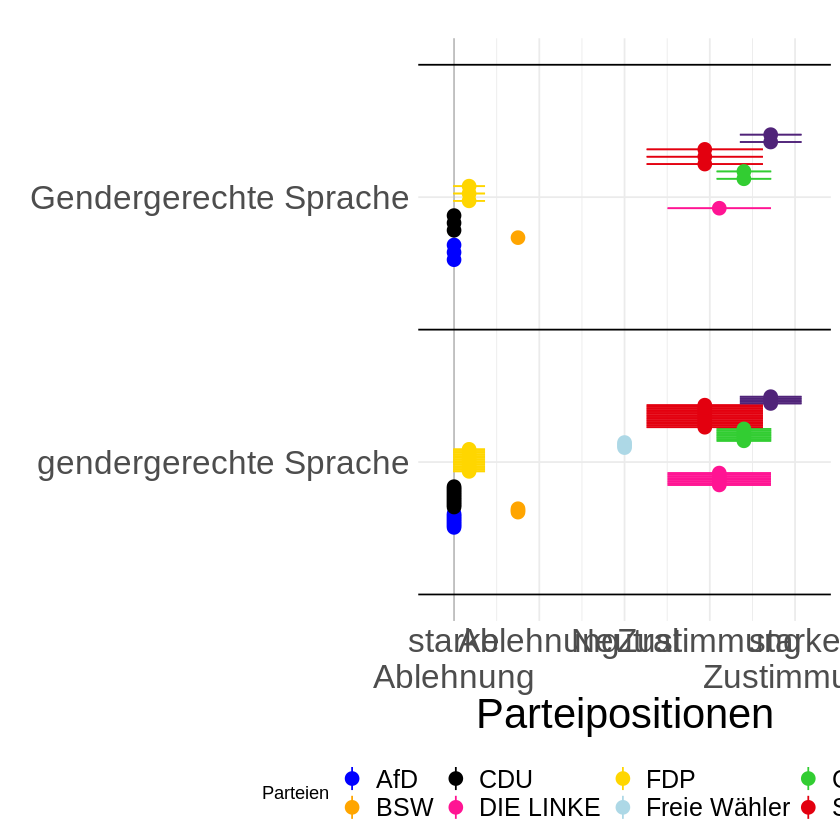

In [44]:
mean_partypos %>%
  filter(str_detect(these_localised, "gendergerechte Sprache genutzt wird")) %>%
  drop_na(mean_pos) %>%
  ggplot(aes(x = these_title, color = party)) +
  geom_hline(yintercept = 0, color = "grey") +
  geom_linerange(aes(x = these_title, ymin = lwr, ymax = upr),
                 position = position_dodge2(width = 1/2),
                 lwd = .4, show.legend=FALSE) +
  geom_pointrange(aes(x = these_title,  y = mean_pos, ymin = lwr, ymax = upr),
                  size = .7, position = position_dodge2(width = 1/2)) +
  geom_vline(xintercept = seq(0.5, 50)) +
  scale_y_continuous(limits = c(-5, 105),
                     breaks = c(0, 25, 50, 75, 100),
                     labels =c("starke\nAblehnung", "Ablehnung", "Neutral", "Zustimmung", "starke\nZustimmung")) +
  scale_color_manual(name = "Parteien",
                     values = party_colors
  ) +
  labs(title = "",
       x = "",
       y = "Parteipositionen") +
  coord_flip() +
  #guides(color = FALSE) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 20),
    axis.text.y = element_text(size = 20),
    axis.title.x = element_text(size = 25),
    legend.text=element_text(size=15),
    legend.position = "bottom"
  )